In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备T')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备S')
device_Z = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备Z')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']
res_df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt','S','Z','res'])

for time in range(1050,1406,3):
    device_wob_temp = device_wob[(device_wob['time']>=time) & (device_wob['time']<(time+3))]
    device_T_temp = device_T[(device_T['time']>=time) & (device_T['time']<(time+3))]
    
    device_wob_temp_des = device_wob_temp[columns].describe()
    device_T_temp_des = device_T_temp[columns].describe()
    
    #每三钟算一组，统计特征,取少的这个device_T_mean
    for column in columns:
        wob_min = device_wob_temp_des[column]['min']
        wob_max = device_wob_temp_des[column]['max']
        wob_mean = device_wob_temp_des[column]['mean']
        wob_std = device_wob_temp_des[column]['std']
        wob_skew = device_wob_temp[column].skew()#偏度计算
        wob_kurt = device_wob_temp[column].kurt()#峰度计算        

        T_min = device_T_temp_des[column]['min']
        T_max = device_T_temp_des[column]['max']
        T_mean = device_T_temp_des[column]['mean']
        T_std = device_T_temp_des[column]['std']
        T_skew = device_T_temp[column].skew()#偏度计算
        T_kurt = device_T_temp[column].kurt()#峰度计算  


        S = device_S[column].values[0]
        Z = device_Z[column].values[0]
        res = column
        row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt,'S':S,'Z':Z,'res':res}
        res_df.loc[len(res_df)] = row

res = pd.merge(left=res_df,right = rock_character, left_on = 'res', right_on ='岩性名称')
# 显示所有列
pd.set_option('display.max_columns', None)
res = res.drop(['序号', '岩性名称', '粒径', '拉强比', '脆性指数'], axis=1)
res.head(n=10)

wob_min  wob_max  wob_mean   wob_std  wob_skew  wob_kurt  T_min   T_max  \
0  3.00286  3.65089  3.413814  0.236150 -1.001939 -0.280232  7.998  11.970   
1  2.94301  3.68661  3.445723  0.233032 -1.300229  1.825893  7.729  11.722   
2  3.13777  3.58919  3.452857  0.162115 -0.970448 -0.402823  7.371  11.553   
3  3.12568  3.66841  3.462618  0.197012 -0.965071 -0.315246  7.635  11.316   
4  3.09211  3.70193  3.497716  0.172160 -1.359834  3.232517  7.677  11.896   
5  3.08004  3.70812  3.386474  0.185854 -0.200894  0.630906  7.814  11.970   
6  3.04238  3.75137  3.461536  0.196606 -0.667626  1.681516  8.141  11.822   
7  3.03917  3.79027  3.482330  0.211688 -0.872401  1.943167  8.035  11.601   
8  2.89840  3.75573  3.388337  0.271653 -0.691519 -0.109878  8.325  11.938   
9  2.98792  3.81703  3.469089  0.291996 -0.227357 -1.116429  7.677  11.179   

      T_mean     T_std    T_skew    T_kurt      S    Z  res    设备S  设备Z  \
0  10.143500  1.191906 -0.029635 -0.159510  101.4  2.4  材料2  101.4  2.4   
1   9.896000  1.476044 -0.212896 -1.272081  101.4  2.4  材料2  101.4  2.4   
2   9.998000  1.337848 -0.663097 -0.087198  101.4  2.4  材料2  101.4  2.4   
3   9.723333  1.133635 -0.272630  0.348469  101.4  2.4  材料2  101.4  2.4   
4   9.825100  1.427393 -0.221311 -1.061463  101.4  2.4  材料2  101.4  2.4   
5   9.915000  1.485106  0.265430 -1.271927  101.4  2.4  材料2  101.4  2.4   
6   9.702000  1.233535  0.315310 -1.174216  101.4  2.4  材料2  101.4  2.4   
7   9.445444  1.268357  0.692701 -0.957530  101.4  2.4  材料2  101.4  2.4   
8   9.625500  1.370101  0.831022 -1.068247  101.4  2.4  材料2  101.4  2.4   
9   9.774333  1.163278 -0.742342 -0.561894  101.4  2.4  材料2  101.4  2.4   

   静态抗压强度   弹性模量   泊松比  抗拉强度    黏聚力   内摩擦角  回弹均值   动态强度  滑动摩擦系数     声级    波速  \
0  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
1  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
2  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
3  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
4  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
5  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
6  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
7  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
8  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   
9  110.95  53.58  0.26  6.65  11.85  38.44  62.0  193.0   0.153  115.7  5.49   

   密度均值      渗透率   孔隙度   标定温度  
0  2.86  0.00176  2.08  60.21  
1  2.86  0.00176  2.08  60.21  
2  2.86  0.00176  2.08  60.21  
3  2.86  0.00176  2.08  60.21  
4  2.86  0.00176  2.08  60.21  
5  2.86  0.00176  2.08  60.21  
6  2.86  0.00176  2.08  60.21  
7  2.86  0.00176  2.08  60.21  
8  2.86  0.00176  2.08  60.21  
9  2.86  0.00176  2.08  60.21

In [8]:
#结合遗传算法优化
import random
import numpy as np
from deap import base, creator, tools
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]

# 初始化creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 设置如下参数范围
param_bounds = {
    'max_depth': (3, 10),  # 对于需要整数的参数，我们将使用randint
    'learning_rate': (0.01, 0.3),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0),
}

# 初始化toolbox
toolbox = base.Toolbox()

# 注册属性生成器
toolbox.register("attr_max_depth", random.randint, *param_bounds['max_depth'])  # 整数生成器
for key, bound in filter(lambda item: item[0] != 'max_depth', param_bounds.items()):
    min_value, max_value = bound
    toolbox.register(f"attr_{key}", random.uniform, min_value, max_value)

# 创建个体生成器
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [(toolbox.attr_max_depth if key == 'max_depth' else getattr(toolbox, f"attr_{key}"))
                  for key in param_bounds.keys()],
                 n=1)

# 创建种群生成器
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# 注册适应度函数
def eval_fitness(individual):
    params = dict(zip(param_bounds.keys(), individual))
    
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = params['learning_rate'] if (0 < params['learning_rate'] < 1) else random.uniform(0.1,0.3)
    params['subsample'] = params['subsample'] if (0< params['subsample']< 1) else random.uniform(0,1)
    params['colsample_bytree'] = params['colsample_bytree'] if (0< params['colsample_bytree']< 1) else random.uniform(0,1)
    
    #print(params)
    # 使用新的参数训练模型
    model = XGBRegressor(**params)
    
    # 训练集和测试集划分保持不变
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
    dtrain = xgb.DMatrix(Xtrain, ytrain, feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest, feature_names=feature_name)
    
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # 使用R²分数作为适应度函数
    fitness = r2_score(ytest, predictions)
    
    return fitness,

toolbox.register("evaluate", eval_fitness)

# 注册选择、交叉和变异算子
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)

# 设置遗传算法参数
POPULATION_SIZE = 10
MAX_GENERATIONS = 10
CXPB = 0.7
MUTPB = 0.2

# 运行遗传算法
pop = toolbox.population(n=POPULATION_SIZE)

for g in range(MAX_GENERATIONS):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

# 找到最优个体及其对应的参数
best_individual = tools.selBest(pop, 1)[0]
best_params = dict(zip(param_bounds.keys(), best_individual))

# 输出最佳参数和对应的R²分数
print(f"Best Parameters: {best_params}")
print(f"Best Fitness (R² Score): {best_individual.fitness.values[0]}")

/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


0-Best Parameters: {'max_depth': 9, 'learning_rate': 0.15530401418889472, 'subsample': 0.804557664288425, 'colsample_bytree': 0.510954440594162}
0-Best Fitness (R² Score): 0.9858203185828074
1-Best Parameters: {'max_depth': 9, 'learning_rate': 0.15530401418889472, 'subsample': 0.804557664288425, 'colsample_bytree': 0.510954440594162}
1-Best Fitness (R² Score): 0.9858203185828074
2-Best Parameters: {'max_depth': 9, 'learning_rate': 0.15530401418889472, 'subsample': 0.804557664288425, 'colsample_bytree': 0.510954440594162}
2-Best Fitness (R² Score): 0.9858203185828074
3-Best Parameters: {'max_depth': 9, 'learning_rate': 0.15530401418889472, 'subsample': 0.804557664288425, 'colsample_bytree': 0.510954440594162}
3-Best Fitness (R² Score): 0.9858203185828074
4-Best Parameters: {'max_depth': 9, 'learning_rate': 0.15530401418889472, 'subsample': 0.804557664288425, 'colsample_bytree': 0.510954440594162}
4-Best Fitness (R² Score): 0.9858203185828074
5-Best Parameters: {'max_depth': 9, 'learning

In [21]:
#结合遗传算法优化
import random
import numpy as np
from deap import base, creator, tools
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]

# 初始化creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 设置如下参数范围
param_bounds = {
    'max_depth': (3, 10),  # 对于需要整数的参数，我们将使用randint
    'learning_rate': (0.01, 0.3),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0),
}

# 初始化toolbox
toolbox = base.Toolbox()

# 注册属性生成器
toolbox.register("attr_max_depth", random.randint, *param_bounds['max_depth'])  # 整数生成器
for key, bound in filter(lambda item: item[0] != 'max_depth', param_bounds.items()):
    min_value, max_value = bound
    toolbox.register(f"attr_{key}", random.uniform, min_value, max_value)

# 创建个体生成器
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [(toolbox.attr_max_depth if key == 'max_depth' else getattr(toolbox, f"attr_{key}"))
                  for key in param_bounds.keys()],
                 n=1)

# 创建种群生成器
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# 注册适应度函数
def eval_fitness(individual):
    params = dict(zip(param_bounds.keys(), individual))
    
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = params['learning_rate'] if (0 < params['learning_rate'] < 1) else random.uniform(0.1,0.3)
    params['subsample'] = params['subsample'] if (0< params['subsample']< 1) else random.uniform(0,1)
    params['colsample_bytree'] = params['colsample_bytree'] if (0< params['colsample_bytree']< 1) else random.uniform(0,1)
    
    #print(params)
    # 使用新的参数训练模型
    model = XGBRegressor(**params)
    
    # 训练集和测试集划分保持不变
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
    dtrain = xgb.DMatrix(Xtrain, ytrain, feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest, feature_names=feature_name)
    
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # 使用R²分数作为适应度函数
    fitness = r2_score(ytest, predictions)
    
    return fitness,

toolbox.register("evaluate", eval_fitness)

# 注册选择、交叉和变异算子
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)

# 设置遗传算法参数
POPULATION_SIZE = 50
MAX_GENERATIONS = 50
CXPB = 0.7
MUTPB = 0.2


# 运行遗传算法
pop = toolbox.population(n=POPULATION_SIZE)

# 新增变量用于记录每一代的信息
all_pop_scores = []
all_best_params = []

temp_res_csv = pd.DataFrame(columns=['遗传代数','参数','R平方'])

for g in range(MAX_GENERATIONS):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values


    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)

    # 更新所有个体的适应度，并记录这一代所有个体的适应度得分
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
        if ind.fitness.values:  # 只记录非空适应度的个体
            all_pop_scores.append(ind.fitness.values[0])


    pop[:] = offspring

    # 每一代结束后，记录最优个体参数及其对应的R²分数
    best_individual = tools.selBest(pop, 1)[0]
    best_params_this_gen = dict(zip(param_bounds.keys(), best_individual))
    best_fit_this_gen = best_individual.fitness.values[0]
    
    all_best_params.append((best_params_this_gen, best_fit_this_gen))
    print(f"{g}-Best Parameters : {best_params_this_gen}")
    print(f"{g}-Best Fitness (R² Score): {best_fit_this_gen}")  
    
    best_params_this_gen['max_depth'] = int(best_params_this_gen['max_depth'])
    best_params_this_gen['learning_rate'] = best_params_this_gen['learning_rate'] if (0 < best_params_this_gen['learning_rate'] < 1) else random.uniform(0.1,0.3)
    best_params_this_gen['subsample'] = best_params_this_gen['subsample'] if (0< best_params_this_gen['subsample']< 1) else random.uniform(0,1)
    best_params_this_gen['colsample_bytree'] = best_params_this_gen['colsample_bytree'] if (0< best_params_this_gen['colsample_bytree']< 1) else random.uniform(0,1)
    
    
    
    temp_res_csv.loc[len(temp_res_csv)] = [g,best_params_this_gen, best_fit_this_gen]

temp_res_csv.to_csv("./新增数据/遗传算法迭代次数与参数变化和结果变化"+'.csv',index=None,encoding='utf-8-sig')

/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/pengxb/opt/miniconda3/envs/yjclassify/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


0-Best Parameters : {'max_depth': 9, 'learning_rate': 0.07690548953216392, 'subsample': 0.8229750709319195, 'colsample_bytree': 0.9841580090897601}
0-Best Fitness (R² Score): 0.9908768471544244
1-Best Parameters : {'max_depth': 8, 'learning_rate': 0.2319810412743146, 'subsample': 0.5183150598734861, 'colsample_bytree': 0.6167226082692854}
1-Best Fitness (R² Score): 0.9917396508545168
2-Best Parameters : {'max_depth': 3, 'learning_rate': 0.2319810412743146, 'subsample': 0.986484365331646, 'colsample_bytree': 0.9764272480447322}
2-Best Fitness (R² Score): 0.9921586278156849
3-Best Parameters : {'max_depth': 6, 'learning_rate': 0.18984014186998546, 'subsample': 0.793310472785673, 'colsample_bytree': 0.7769348636509982}
3-Best Fitness (R² Score): 0.9920350760957045
4-Best Parameters : {'max_depth': 6.038880364689611, 'learning_rate': 0.2458209812299366, 'subsample': 0.1992741969067297, 'colsample_bytree': 0.9054469987280189}
4-Best Fitness (R² Score): 0.9920350760957045
5-Best Parameters :

41-Best Parameters : {'max_depth': 3.993053194855809, 'learning_rate': 0.2319810412743146, 'subsample': 0.793310472785673, 'colsample_bytree': 0.9764272480447322}
41-Best Fitness (R² Score): 0.9909047515324266
42-Best Parameters : {'max_depth': 5.940745485524147, 'learning_rate': 0.2319810412743146, 'subsample': 0.793310472785673, 'colsample_bytree': 0.9764272480447322}
42-Best Fitness (R² Score): 0.9908959188048693
43-Best Parameters : {'max_depth': 5.940745485524147, 'learning_rate': 0.2319810412743146, 'subsample': 0.793310472785673, 'colsample_bytree': 0.9764272480447322}
43-Best Fitness (R² Score): 0.9908959188048693
44-Best Parameters : {'max_depth': 3.993053194855809, 'learning_rate': 0.2319810412743146, 'subsample': 0.793310472785673, 'colsample_bytree': 0.8818331310226484}
44-Best Fitness (R² Score): 0.9910301965848467
45-Best Parameters : {'max_depth': 5.815167374861396, 'learning_rate': 0.2319810412743146, 'subsample': 0.793310472785673, 'colsample_bytree': 0.976427248044732

The training time = 0.14527416229248047
The R2_score = 0.9855755657059866
The rmse of prediction is: 1.1997380965109417


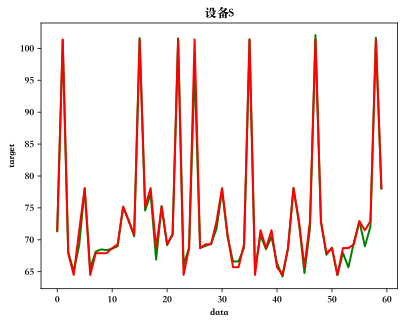

The training time = 0.16800594329833984
The R2_score = 0.9788755638000233
The rmse of prediction is: 0.09229484671482155


The training time = 0.152479887008667
The R2_score = 0.9927671764414977
The rmse of prediction is: 4.125105941696813


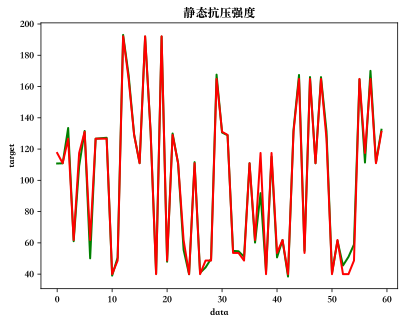

The training time = 0.14958620071411133
The R2_score = 0.9872245060548227
The rmse of prediction is: 1.9035130935158622


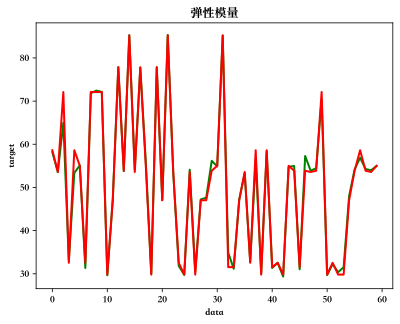

The training time = 0.1472458839416504
The R2_score = 0.9475446123866885
The rmse of prediction is: 0.008119018304178207


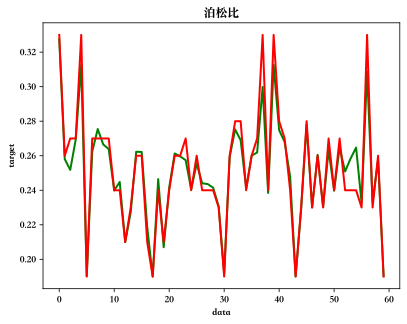

The training time = 0.17873024940490723
The R2_score = 0.9492295693597514
The rmse of prediction is: 0.6428919058953915


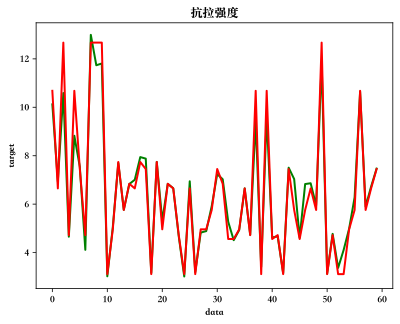

The training time = 0.1768331527709961
The R2_score = 0.9574488043271008
The rmse of prediction is: 0.8103367649256428


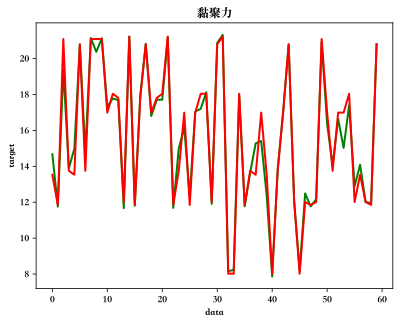

The training time = 0.14777302742004395
The R2_score = 0.9405188062312587
The rmse of prediction is: 1.1354450382507557


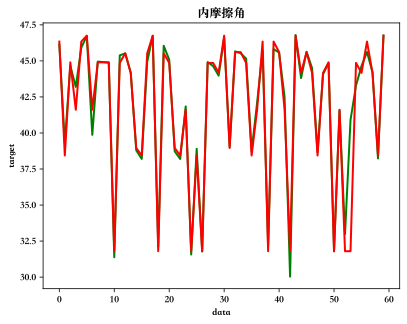

The training time = 0.14688897132873535
The R2_score = 0.982973679027789
The rmse of prediction is: 1.6909940787843185


The training time = 0.16460013389587402
The R2_score = 0.9794208504798436
The rmse of prediction is: 8.870655818979543


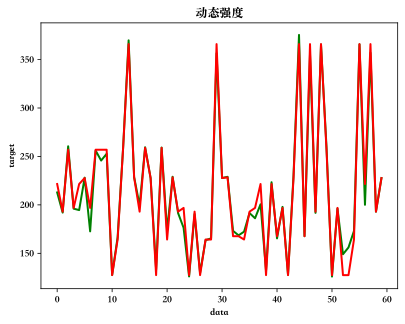

The training time = 0.14107537269592285
The R2_score = 0.9670983263321369
The rmse of prediction is: 0.007012637275777442


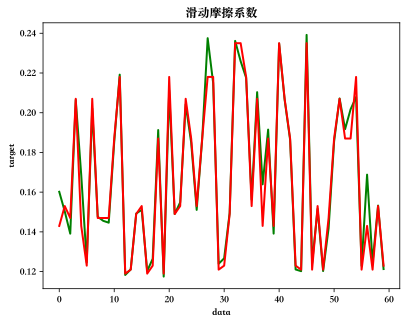

The training time = 0.1309950351715088
The R2_score = 0.984016086407138
The rmse of prediction is: 0.5798508440229141


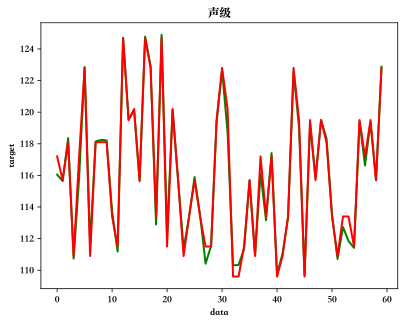

The training time = 0.16430020332336426
The R2_score = 0.9791727915495243
The rmse of prediction is: 0.17319743224756132


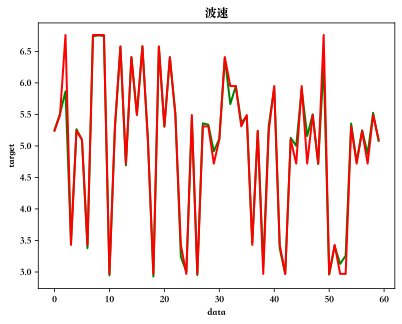

The training time = 0.15300512313842773
The R2_score = 0.9781782953797739
The rmse of prediction is: 0.0806922628378756


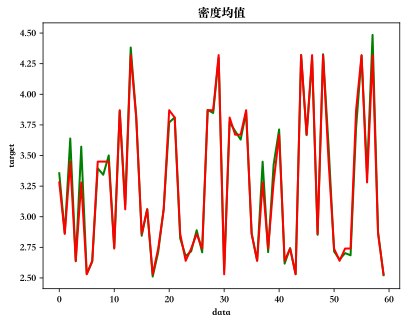

The training time = 0.13788199424743652
The R2_score = 0.9720987498174964
The rmse of prediction is: 0.009232448858864031


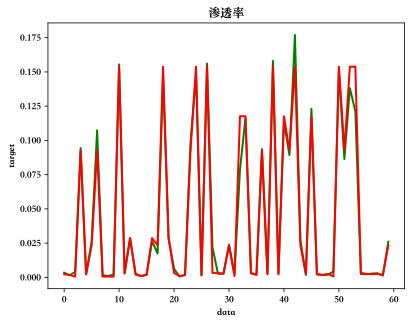

The training time = 0.1678168773651123
The R2_score = 0.9795002618287791
The rmse of prediction is: 0.8898933014611827


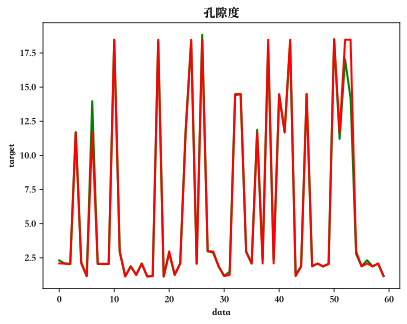

The training time = 0.13998699188232422
The R2_score = 0.9891474807799475
The rmse of prediction is: 0.4324155739612003


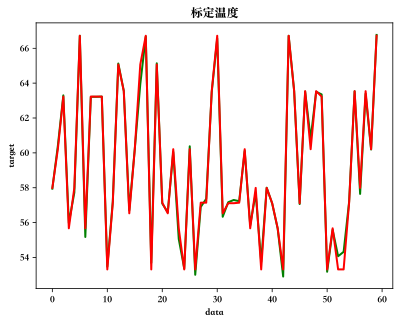

In [5]:
columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]

for pred_y in columns:
    ## Y为要预测的数值
    y = res[pred_y]
    feature_name =X.columns
    #将数据分割训练数据与测试数据
    #print(np.isnan(X).any())
    from sklearn.model_selection import train_test_split
    # 随机采样20%的数据构建测试样本，其余作为训练样本
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

    dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
    #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
    params = {'booster':'gbtree',
              'objective':'reg:squarederror',
              'eta':0.1,
              'gamma':0,
           #  'alpha':0,
           #  'lambda':3,
              'max_depth':7,
              'subsample':0.6849912226732566,
              'colsample_bytree':0.9269737580495006,
              'min_child_weight':1,
              'learning_rate':0.1970728149783871,
            #  'seed':1000,
              'nthread':1
              }
    num_round = 50

    start_time = time.time()
    bst = xgb.train(params, dtrain, num_round)
    end_time = time.time()
    print('The training time = {}'.format(end_time - start_time))

    # 保存模型
    bst.save_model("./模型/model_"+pred_y+".xgb")  # 将模型保存为model.xgb文件

    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("./模型/model_"+pred_y+".xgb")  # 从model.xgb文件加载模型

    # 使用加载后的模型进行预测
    bst_ypred = loaded_bst.predict(dtest)
    r2score = r2_score(ytest, bst_ypred)
    bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

    print('The R2_score = {}'.format(r2score))
    print('The rmse of prediction is:', bst_rmse)
    #plot_importance(bst,importance_type="weight")
    plt.figure()
    plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
    plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
    #数据保存
    temp_csv = pd.DataFrame(columns=['ytest','ypred'])
    temp_csv['ytest'] = ytest[:60]
    temp_csv['ypred'] = bst_ypred[:60]
    temp_csv.to_csv("./拟合结果/"+pred_y+'.csv',index=None,encoding='utf-8-sig')
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(pred_y)
    plt.show()